# Rf 3 1 4_Paramfitrange

Multidimensional models: working with parameterized ranges in a fit. ROOT.This an example of a fit with an acceptance that changes per-event

pdf = exp(-t/tau) with t[tmin,5]

where t and tmin are both observables in the dataset




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:51 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Define observables and decay pdf
---------------------------------------------------------------

Declare observables

In [2]:
t = ROOT.RooRealVar("t", "t", 0, 5)
tmin = ROOT.RooRealVar("tmin", "tmin", 0, 0, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Make parameterized range in t : [tmin,5]

In [3]:
t.setRange(tmin, ROOT.RooFit.RooConst(t.getMax()))

Make pdf

In [4]:
tau = ROOT.RooRealVar("tau", "tau", -1.54, -10, -0.1)
model = ROOT.RooExponential("model", "model", t, tau)

Create input data
------------------------------------

Generate complete dataset without acceptance cuts (for reference)

In [5]:
dall = model.generate(ROOT.RooArgSet(t), 10000)

Generate a (fake) prototype dataset for acceptance limit values

In [6]:
tmp = ROOT.RooGaussian("gmin", "gmin", tmin, ROOT.RooFit.RooConst(
    0), ROOT.RooFit.RooConst(0.5)).generate(ROOT.RooArgSet(tmin), 5000)

Generate dataset with t values that observe (t>tmin)

In [7]:
dacc = model.generate(ROOT.RooArgSet(t), ROOT.RooFit.ProtoData(tmp))

Fit pdf to data in acceptance region
-----------------------------------------------------------------------

In [8]:
r = model.fitTo(dacc, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 tau         -1.54000e+00  7.20000e-01   -1.00000e+01 -1.00000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2824.02 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIR

Plot fitted pdf on full and accepted data
---------------------------------------------------------------------------------

Make plot frame, datasets and overlay model

In [9]:
frame = t.frame(ROOT.RooFit.Title("Fit to data with per-event acceptance"))
dall.plotOn(frame, ROOT.RooFit.MarkerColor(ROOT.kRed),
            ROOT.RooFit.LineColor(ROOT.kRed))
model.plotOn(frame)
dacc.plotOn(frame)

<ROOT.RooPlot object ("frame_t_561bf0204070") at 0x561bf0204070>

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 5000 will supercede previous event count of 10000 for normalization of PDF projections


Print fit results to demonstrate absence of bias

In [10]:
r.Print("v")

c = ROOT.TCanvas("rf314_paramranges", "rf314_paramranges", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf314_paramranges.png")


  RooFitResult: minimized FCN value: 2823.97, estimated distance to minimum: 6.74739e-08
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                   tau   -1.5400e+00   -1.5335e+00 +/-  2.22e-02  <none>



Info in <TCanvas::Print>: png file rf314_paramranges.png has been created


Draw all canvases 

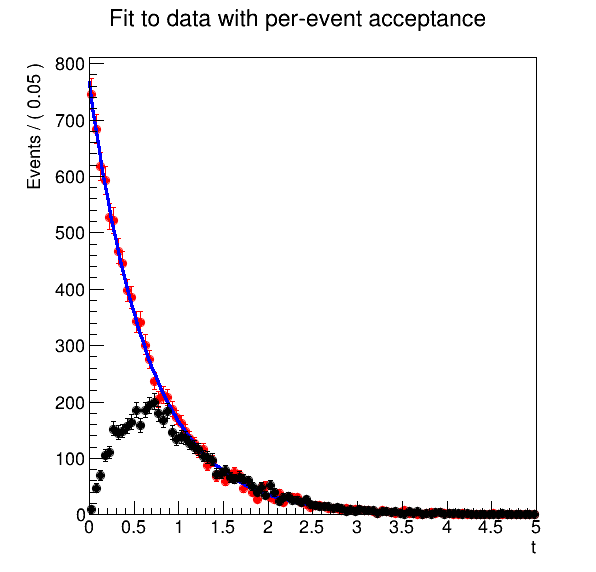

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()